/var/folders/1g/wmgqn3xd181cczh_vn2lyjj80000gn/T/ipykernel_6694/2178998571.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill').fillna(method='bfill')


Logistic Regression:
Accuracy: 0.5395318382714028
ROC AUC: 0.5131574036278501
              precision    recall  f1-score   support

           0       0.45      0.03      0.05      5593
           1       0.54      0.97      0.70      6625

    accuracy                           0.54     12218
   macro avg       0.50      0.50      0.37     12218
weighted avg       0.50      0.54      0.40     12218


Random Forest:
Accuracy: 0.5094123424455721
ROC AUC: 0.5015210387647632
              precision    recall  f1-score   support

           0       0.46      0.42      0.44      5593
           1       0.54      0.59      0.56      6625

    accuracy                           0.51     12218
   macro avg       0.50      0.50      0.50     12218
weighted avg       0.51      0.51      0.51     12218



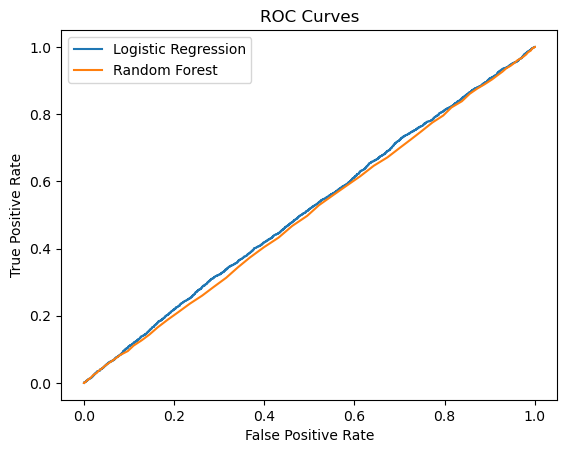

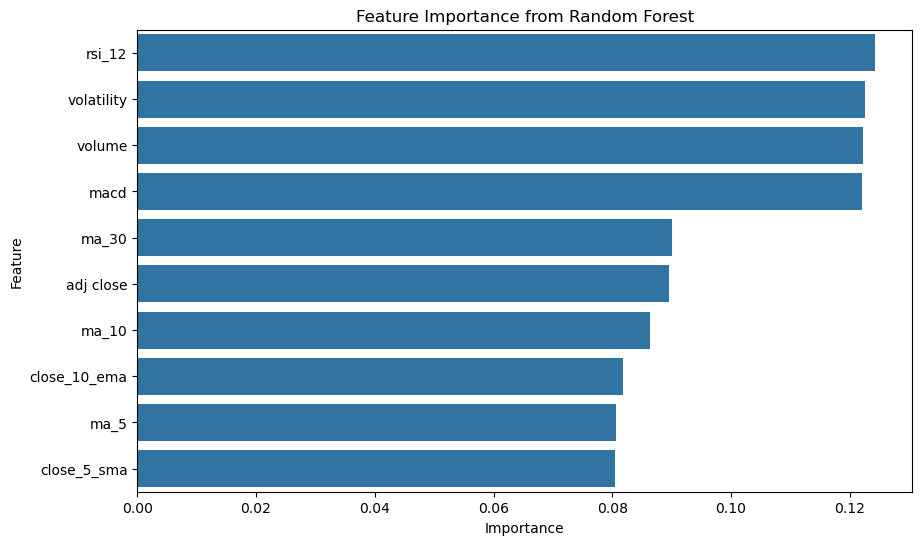

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('../data/processed/indexData_processed.csv')

# Select features and target
# features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'ma_5', 'ma_10', 'ma_30', 'volatility', 'pct_return']
# X = df[features]
# y = df['price_direction']


features = ['adj close', 'volume','ma_5', 'ma_10', 'ma_30', 'volatility', 'macd', 'rsi_12', 'close_5_sma', 'close_10_ema']
X = df[features]
y = df['price_direction']


# Handle any potential NaN values that might exist in the dataset
X = X.fillna(method='ffill').fillna(method='bfill')

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for Logistic Regression (which benefits from normalized features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression and Random Forest models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train both models
log_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
log_reg_preds = log_reg.predict(X_test_scaled)
rf_preds = random_forest.predict(X_test)

# Evaluate both models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))
print(classification_report(y_test, log_reg_preds))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, rf_preds))

# ROC Curves
plt.figure()
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

#Visualizing Feature Importances for Random Forest

importances = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

